In [13]:
# Title: Knn Algorithm
# Author: Chun-Chieh Liang
# Date: July, 20, 2017 
import pandas as pd
import numpy as np
# read training and testing data
train = pd.read_csv('crx.data.training', header=None)
test = pd.read_csv('crx.data.testing', header=None)

In [14]:
def get_mean(data, col):
    # return the mean of the column
    sum = 0
    count = 0
    for i in data[col]:
        if i != '?':
            sum += float(i)
            count += 1
    #print("sum: {0}, instance: {1}".format(sum, count))
    return sum / count

def get_mode(data, col):
    # return the mode of the column
    return data[col].mode()[0]

def is_number(s):
    try:
        complex(s) # for int, long, float and complex
    except ValueError:
        return False
    return True

def get_check_list(data):
    # return a list which checks the data if it's numeric
    is_num = []
    temp = data.copy()
    for i in range(len(data.columns)):
        temp[i].replace("?", 0, inplace = True)
        is_num.append(is_number(get_mode(temp, i)))
    return is_num

# print(get_mean(train, 1))
# print(get_mode(test, 2))
# print(get_check_list(train))
# print(get_check_list(test))

In [15]:
def set_dataset(data):
    # set the dataset to appropriate format
    cl = get_check_list(data)
    # print(cl)
    for i in range(len(data.columns)):
        if cl[i]:
            data[i].replace('?', get_mean(data, i), inplace=True)
        else:
            data[i].replace('?', get_mode(data, i), inplace=True)
set_dataset(train)
set_dataset(test)

In [16]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,31.2665,4.000,y,p,i,v,0.085,f,f,0,t,g,00411,0,-
1,b,43.17,2.250,u,g,i,bb,0.750,t,f,0,f,g,00560,0,-
2,a,71.58,0.000,u,g,c,v,0.000,f,f,0,f,p,182.576,0,+
3,b,48.75,8.500,u,g,c,h,12.500,t,t,9,f,g,00181,1655,+
4,a,38.33,4.415,u,g,c,v,0.125,f,f,0,f,g,00160,0,-


In [17]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,32.83,2.50,u,g,cc,h,2.750,t,t,6,f,g,00160,2072,+
1,a,46.08,3.00,u,g,c,v,2.375,t,t,8,t,g,00396,4159,+
2,b,26.67,2.71,y,p,cc,v,5.250,t,t,1,f,g,00211,0,+
3,a,24.58,0.67,u,g,aa,h,1.750,t,f,0,f,g,00400,0,-
4,b,39.00,5.00,u,g,cc,v,3.500,t,t,10,t,g,00000,0,+


In [18]:
def normalize(data):
    # normalize the numeric data
    cl = get_check_list(data)
    for i in range(len(data.columns)):
        if cl[i]:
            print("row: {0}, std: {1}, mean: {2}".format(i, data[i].astype(float).std(), get_mean(data, i)))
            data[i] = (data[i].astype(float) - get_mean(data, i))/data[i].astype(float).std()
        else:
            continue
normalize(train)
normalize(test)

row: 1, std: 11.8310195151958, mean: 31.26653211009174
row: 2, std: 4.922021430433584, mean: 4.72504528985507
row: 7, std: 3.238457920276146, mean: 2.128242753623187
row: 10, std: 4.371180927900063, mean: 2.3659420289855073
row: 13, std: 168.3246144761446, mean: 182.5759259259259
row: 14, std: 5612.625468720897, mean: 1025.8369565217392
row: 1, std: 11.907990460345863, mean: 32.80421052631579
row: 2, std: 5.213020013820976, mean: 4.893442028985506
row: 7, std: 3.736335666879106, mean: 2.6040579710144924
row: 10, std: 6.485423769044353, mean: 2.536231884057971
row: 13, std: 187.25913002698826, mean: 189.68613138686132
row: 14, std: 3133.830283443048, mean: 983.5797101449275


In [19]:
train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,0.000000,-0.147306,y,p,i,v,-0.630931,f,f,-0.541259,t,g,1.357045e+00,-0.182773,-
1,b,1.006124,-0.502851,u,g,i,bb,-0.425586,t,f,-0.541259,f,g,2.242239e+00,-0.182773,-
2,a,3.407438,-0.959981,u,g,c,v,-0.657178,f,f,-0.541259,f,p,1.688506e-16,-0.182773,+
3,b,1.477765,0.766952,u,g,c,h,3.202684,t,t,1.517681,f,g,-9.362421e-03,0.112098,+
4,a,0.597030,-0.062991,u,g,c,v,-0.618579,f,f,-0.541259,f,g,-1.341214e-01,-0.182773,-


In [20]:
test.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,0.002166,-0.459128,u,g,cc,h,0.039060,t,t,0.534085,f,g,-0.158530,0.347313,+
1,a,1.114864,-0.363214,u,g,c,v,-0.061306,t,t,0.842469,t,g,1.101756,1.013271,+
2,b,-0.515134,-0.418844,y,p,cc,v,0.708165,t,t,-0.236875,f,g,0.113820,-0.313859,+
3,a,-0.690646,-0.810172,u,g,aa,h,-0.228582,t,f,-0.391066,f,g,1.123117,-0.313859,-
4,b,0.520305,0.020441,u,g,cc,v,0.239792,t,t,1.150853,t,g,-1.012961,-0.313859,+


In [21]:
import math
import operator

cl = get_check_list(train)

def get_distance(instance1, instance2):
    # return the euclidean distance
    distance = 0
    for i in range(len(cl)-1):
        if cl[i]:
            distance += pow((instance1[i] - instance2[i]), 2)
        else:
            if instance1[i] != instance2[i]:
                distance += 1
            else:
                distance += 0
    return math.sqrt(distance)

# Distance: 3.358637976572944
#data1 = ["b",0.000000,-0.147306,"y","p","i","v",-0.630931,"f","f",-0.541259,"t","g",1.357045e+00,-0.182773,"-"]
#data2 = ["b",0.002166,-0.459128,"u","g","cc","h",0.039060,"t","t",0.534085,"f","g",-0.158530,0.347313,"+"]
# Distance: 3.3586378931596044
# data1 = train.iloc[0]
# data2 = test.iloc[0]
# distance = get_distance(data1, data2)
# print ('Distance:', distance)

def get_neighbors(trainingSet, testInstance, k):
    # return the neighbors by the given k
    distances = []
    length = len(testInstance)-1
    for x in range(len(trainingSet)):
        dist = get_distance(testInstance, trainingSet[x])
        distances.append((trainingSet[x], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

# trainSet = [["b",0.000000,-0.147306,"y","p","i","v",-0.630931,"f","f",-0.541259,"t","g",1.357045e+00,-0.182773,"-"],["b",1.006124,-0.502851,"u","g","i","bb",-0.425586,"t","f",-0.541259,"f","g",2.242239e+00,-0.182773,"-"]]
# testInstance = ["b",0.002166,-0.459128,"u","g","cc","h",0.039060,"t","t",0.534085,"f","g",-0.158530,0.347313,"+"]
# neighbors = getNeighbors(trainSet, testInstance, 1)

# neighbors = get_neighbors(train.iloc[0:2].values.tolist(), test.iloc[0].values.tolist(), 2)
# print(neighbors)
def get_response(neighbors):
    # retrun the most frequent class
    classVotes = {}
    for x in range(len(neighbors)):
        response = neighbors[x][-1]
        if response in classVotes:
            classVotes[response] += 1
        else:
            classVotes[response] = 1
    sortedVotes = sorted(classVotes.items(), key=operator.itemgetter(1), reverse=True)
    return sortedVotes[0][0]

# neighbors = [['b', -0.6209551172370082, -0.6552278033399327, 'u', 'g', 'd', 'h', -0.07819856235822047, 't', 't', 0.8313675482566474, 'f', 'g', 0.10351471249942167, -0.12451159629594925, '+'], ['b', -0.3039917316907763, -0.5536435239809632, 'u', 'g', 'x', 'h', -0.3483888879825189, 't', 't', 0.37382528839855234, 'f', 'g', -0.2529393936735252, 1.1613393909506193, '+'], ['b', -0.5440386690111229, -0.40126710494250883, 'u', 'g', 'c', 'v', 0.03759729148076456, 't', 't', 0.8313675482566474, 'f', 'g', 1.6885058384869793e-16, -0.07587125827207324, '+']]
# response = getResponse(neighbors)
# print(response)

def get_accuracy(testSet, predictions):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] is predictions[x]:
            correct += 1
    return (correct/float(len(testSet))) * 100.0

# testSet = test.iloc[0:3].values.tolist()
# predictions = ['+', '-', '-']
# accuracy = get_accuracy(testSet, predictions)
# print(accuracy)

In [22]:
def knn(k):
    predictions=[]
    for x in range(len(test)):
        neighbors = get_neighbors(train.iloc[:].values.tolist(), test.iloc[x].values.tolist(), k)
        #print(neighbors)
        result = get_response(neighbors)
        predictions.append(result)

    accuracy = get_accuracy(test.iloc[:].values.tolist(), predictions)
    #print("When K is {0}, the accuracy is {1} %.".format(k, accuracy))
    return accuracy

In [23]:
print("When K is {0}, the accuracy is {1} %.".format(1, knn(1)))

When K is 1, the accuracy is 82.6086956521739 %.


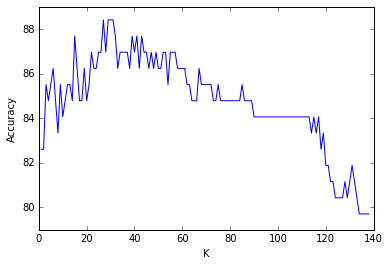

In [24]:
import matplotlib.pyplot as plt
al = [] # accuracy
kl = [] # k
for i in range(len(test)):
    i += 1
    al.append(knn(i))
    kl.append(i)

plt.plot(kl, al)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.show()